In [53]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from random import random
from scipy.interpolate import interp1d
from astroML.correlation import two_point
from astroML.correlation import ra_dec_to_xyz
from astroML.datasets import fetch_sdss_specgals

Populating the interactive namespace from numpy and matplotlib


C:\Users\tu_rk\miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [54]:
#Se cargan las funciones de correlación previamente calculadas
corr=np.load("corr.npy")
corr2=np.load("corr2.npy")
corrxyz=np.load("corrxyz.npy")
corr2xyz=np.load("corr2xyz.npy")
corrxyzfull=np.load("corrxyzfull.npy")

In [55]:
#Read the true power spectrum used to generate the simulation. 
Pk=np.loadtxt('./input_spectrum.dat')
pk_=interp1d(Pk[:,0],Pk[:,1])
kh=10**np.linspace(-4,2,5000)
def xi_true():
    pk_h=pk_(kh)
    # Compute the correlation  function from the true  P(k) used in the simulation. Fourier Transform. 
    kstart =0
    kcut = 10
    kcut_ind = np.argmin(abs(kh - kcut))

    r_start = 1
    r_end = 150
    r_stepsize = 1
    r_list = np.arange(r_start, r_end, r_stepsize)

    xi = np.zeros(len(r_list))
    factor = np.power(kh[kstart:kcut_ind],2) * pk_h[kstart:kcut_ind] / (kh[kstart:kcut_ind]*2*np.pi**2)
    for i in range(0, len(r_list)):
        IntegrandXi0 = factor * np.sin(kh[kstart:kcut_ind]*r_list[i]) / r_list[i]
        xi[i] = np.trapz(IntegrandXi0,kh[kstart:kcut_ind])
    return r_list, xi

In [56]:
#Cargamos los datos muestra de 250k y datos de la librería astroml
datos=np.load("../Remoto_Semana6/prueba_250k.npy")
data=fetch_sdss_specgals()

In [57]:
#Cortes a datos de librería
Mmax = 17.7
Zmin,Zmax=0.08,0.12 
RAmin,RAmax=140,220
DECmin,DECmax=5,45
#redshift
data=data[data['z'] < Zmax]
data=data[data['z'] > Zmin]
data=data[data['petroMag_r'] < Mmax]
#right ascension
data=data[data['ra'] < RAmax]
data=data[data['ra'] > RAmin]
#declinación
data=data[data['dec'] < DECmax]
data=data[data['dec'] > DECmin]

In [58]:
#Transformación de coordenadas de datos de librería
datosxyz=ra_dec_to_xyz(data['ra'],data['dec'])
datosxyz=np.transpose(datosxyz)

In [ ]:
#Cálculos de correlación de datos muestra de 250k
bins=np.linspace(1.,130,40)

start_time = time.time()
corr=two_point(datos,bins,method='standard')
print("corr: %.3f seconds" % (time.time() - start_time))
np.save('corr.npy', corr)

start_time = time.time()
corr2=two_point(datos,bins,method='landy-szalay')
print("corr2: %.3f seconds" % (time.time() - start_time))
np.save('corr2.npy', corr2)

In [80]:
#Cálculos de correlación de datos de librería
binsxyz=np.linspace(0.,1.5,40)

start_time = time.time()
corrxyz=two_point(datosxyz,binsxyz,method='standard')
print("corrxyz: %.3f seconds" % (time.time() - start_time))
np.save('corrxyz.npy',corrxyz)

start_time = time.time()
corr2xyz=two_point(datosxyz,binsxyz,method='landy-szalay')
print("corr2xyz: %.3f seconds" % (time.time() - start_time))
np.save('corr2xyz.npy',corr2xyz)

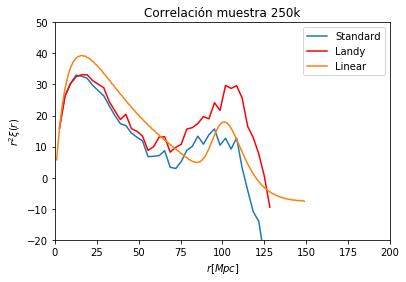

In [79]:
bins=np.linspace(1.,130,40)
r=0.5*(bins[1:] + bins[:-1])

r2corr=np.power(r,2)*(corr)
r2corr2=np.power(r,2)*(corr2)
r2corrxyz=np.power(r,2)*(corrxyz)
r2corr2xyz=np.power(r,2)*(corr2xyz)

r_,xi=xi_true()


#Gráfica de correlaciones de muestra de 250k
plt.plot(r,r2corr,label='Standard')
plt.plot(r,r2corr2,color='r',label='Landy')
plt.plot(r_, np.power(r_,2)*xi ,label='Linear')
#legend()
plt.xlim(0,200)
plt.ylim(-20,50)
plt.xlabel(r'$r[Mpc]$')
plt.ylabel(r'$r^2\xi(r)$')
plt.title('Correlación muestra 250k')
plt.legend();

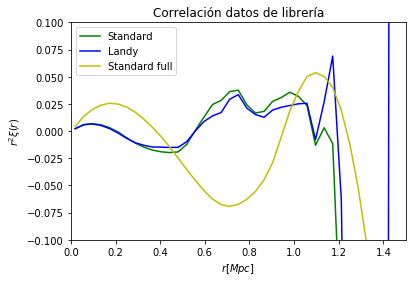

In [82]:
binsxyz=np.linspace(0.,1.5,40)
r2corrxyz=np.power(r,2)*(corrxyz)
r2corr2xyz=np.power(r,2)*(corr2xyz)
r2corrxyzfull=np.power(r,2)*(corrxyzfull)
r=0.5*(binsxyz[1:] + binsxyz[:-1])

#Gráfica de correlaciones de datos de librería
plt.plot(r,r2corrxyz,color='g',label='Standard')
plt.plot(r,r2corr2xyz,color='b',label='Landy')

plt.plot(r,r2corrxyzfull,color='y',label='Standard full')
plt.xlim(0,1.5)
plt.ylim(-0.1,0.1)
plt.xlabel(r'$r[Mpc]$')
plt.ylabel(r'$r^2\xi(r)$')
plt.title('Correlación datos de librería')
plt.legend();